# **Propiedades Opto-Electrónicas del Pentagrafeno**

*Nombre:* Jhon Wilmer Pino Román  
*Documento:* 1017269052  
*Curso:* Físico-Química Computacional  
*Docente:* Julian David Correa  
Facultad de Ciencias Básicas  
**Universidad de Medellín 2023-1**


##**Resumen**

El siguiente proyecto sirve como base para el proyecto final del curso de Físico química computacional 2023-1. Vamos a poner en práctica varias de las metodologías computacionales comunmente utilizadas para el cálculo de propiedades estructuras periódicas (arreglos 2D). En particular se trabajará el código GPAW en los métodos de ondas planas, lcao, y df para cálculo de estrcuturas de bandas, niveles de energía y absorción foto-electrónica (y fonones). De igual forma se presenta el análisis de cada resultado y las respectivas conclusiones.


##**Introducción**
El pentagrafeno es un alótropo bidimensional del carbono que se compone de una estructura de cinco anillos de grafeno fusionados. Cada anillo de grafeno está unido a los otros cuatro a través de átomos de carbono en común, formando un patrón pentagonal. El pentagrafeno es considerado un material prometedor para aplicaciones en electrónica y energía debido a sus propiedades únicas, como una alta conductividad eléctrica y térmica, así como una alta estabilidad térmica. Aunque todavía está en sus primeras etapas de investigación y desarrollo, el pentagrafeno es un área de interés activo en la ciencia de materiales.

Una de las áreas de mayor interés en la investigación del pentagrafeno es su comportamiento electrónico. Dado que el pentagrafeno es un material bidimensional compuesto exclusivamente de átomos de carbono, se espera que tenga propiedades electrónicas únicas y fascinantes.

Algunas de las propiedades electrónicas del pentagrafeno incluyen su alta conductividad eléctrica y su capacidad para transportar electrones de manera eficiente. Estas propiedades son resultado de la estructura pentagonal única del pentagrafeno, que le permite tener una alta densidad de estados electrónicos cercanos al nivel de Fermi.

En general, el análisis de las propiedades electrónicas del pentagrafeno es fundamental para comprender su comportamiento en diversas aplicaciones y para optimizar su rendimiento en futuras tecnologías.

##**Marco Teórico**

**Estructura de Bandas**: Una estructura de bandas es un modelo teórico que describe cómo los electrones se distribuyen en los átomos y cómo se comportan en materiales sólidos. En este modelo, los electrones de los átomos están organizados en bandas de energía en lugar de orbitales atómicos individuales.

**Celda Unitaria**: Una celda unitaria es la unidad básica y repetitiva de una estructura cristalina en un material sólido. Es la estructura más pequeña que se repite en el espacio tridimensional para formar un cristal.

**Niveles de Fermi**: El "Nivel de Fermi" es el término utilizado para describir la parte superior del conjunto de niveles de energía de electrones a la temperatura de cero absoluto. Este concepto proviene de las estadísticas de Fermi-Dirac. Los electrones son fermiones y por el principio de exclusión de Pauli no pueden existir en estados de energías idénticas.  

**LCAO**: Es el acrónimo para Linear Combination of Atomic Orbitals (combinación lineal de orbiatles atómicos), es un modelo teórico que describe cómo los orbitales atómicos individuales de un átomo se pueden combinar para formar orbitales moleculares en moléculas mas grandes.

**DF**: El método de diferencias finitas es una técnica numérica utilizada para aproximar soluciones de ecuaciones diferenciales, tanto ordinarias como parciales. Consiste en dividir el dominio de la ecuación diferencial en una malla discreta de puntos y aproximar las derivadas en cada punto basado en la diferencia de los valores de la función en puntos adyacentes.

**Ondas Planas**: El método de ondas planas es una técnica utilizada en la teoría de la dispersión y la difracción de ondas, como las ondas electromagnéticas y acústicas. En este método, se supone que la onda incidente sobre un objeto o una estructura es una onda plana, es decir, una onda que se propaga en una dirección con una amplitud constante y una fase uniforme en todo su frente de onda.

**Optical photo-absortion spectrum**: El espectro de absorción foto-óptica es una técnica utilizada para investigar la absorción de luz por un material en función de la longitud de onda de la luz incidente. Se utiliza para determinar la estrcutura electrónica de los materiales y para estudiar sus propiedades ópticas.

**Fonones**: Los fonones son las unidades cuánticas de vibración de un cristal sólido. Los fonones describen la energía y el movimiento de las vibraciones de las partículas en un material. 

**GPAW**: Es un software de simulación de materiales basado en la teoría del funcional de la densidad (DFT) que se utiliza para realizar cálculos de estructura de sólidos, superficies y estrcuturas.

**Densidad total de estados**: La densidad total de estados se utiliza para describir la densidad de electrones en un material a lo largo de un rango de energía. En este contexto, la densidad de estados es importante porque los electrones pueden moverse entre estados y contribuir a las propiedades eléctricas y ópticas del material.


A través de este trabajo, exploraremos algunas de esas propiedades básicas 
##**Desarrollo**

Primero vamos a visualizar la estructura primaria que se nos entregó para trabajar, para ello primero haremos la instalación de todas las librerías requeridas y después de eso leeremos la estrucutra y la graficaremos



In [ ]:
%%capture

!pip install ase gpaw

In [ ]:
%%capture

!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw

In [ ]:
from ase import Atoms
from ase.io  import  read 
from ase.visualize.plot import plot_atoms
from gpaw import GPAW,PW,FermiDirac
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from ase.optimize import BFGS
from ase.constraints import ExpCellFilter



<Axes: >

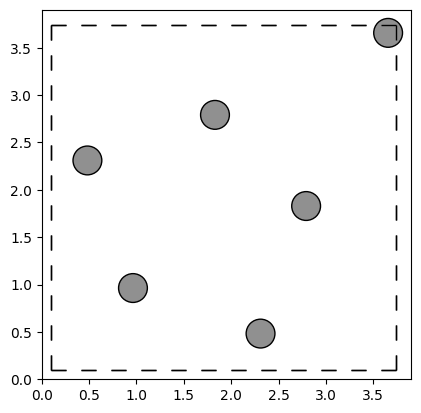

In [ ]:
penta = read("penta.cif")

fig,ax =plt.subplots()

plot_atoms(penta,ax,radii=0.2,rotation=('0x,0y,0z'))

Ahora teniendo nuestra materia prima, vamos a comenzar con la implementación de cada uno de los cálculos que se piden realizar para el reporte. 
## **Estrcturas de Bandas**

El cálculo de la estructura de bandas, nos permitirá describir la estructura electrónica de nuestro material de análisis. Este se realizará en tres métodos distintos, con el objetivo de corroborar, analizar y comparar los resultados obtenidos con cada implementación.

**1. Método de ondas planas**

Lo primero que haremos, será determinar las bases de cálculo para ondas planas, que es el método que más hemos trabajado. Para esto, vamos a ejecutar una rutina recursiva que genere los cálculos con distintas bases hasta encontrar los números donde empecemos a notar convergencia. De modo que así tendremos cálculos precisos sin ejercer un consumo computacional más grande de lo necesario.

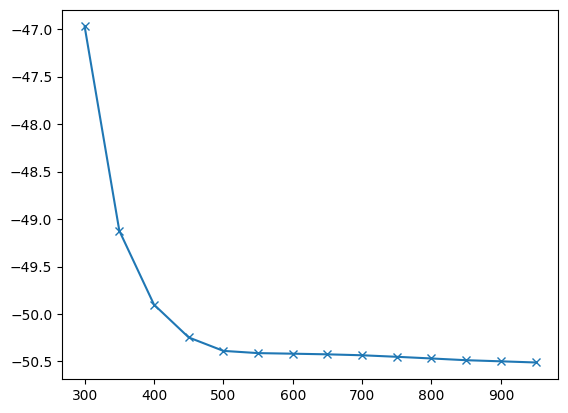

In [ ]:
energies = np.arange(300,1000,50)
Totalenergy = []
for i in range(len(energies)):

  penta.calc = GPAW(xc='PBE', 
                mode=PW(energies[i]),
                kpts={'size':(1,1,1),'gamma':True},
                txt='pentah5.txt')
  energy = penta.get_potential_energy()
  Totalenergy.append(energy)

plt.plot(energies,Totalenergy,'-x')

Dado esto, vemos que los cálculos convergen en un tamaño de base muy grande, en este caso la convergencia se presenta apartir de un tamaño de base de alrededor de 700 a 800. Dado esto, escogeremos un tamaño de ``````750`````` como base para los cálculos realizados.

Ahora, realizaremos el mismo procedimiento para los k-points

In [ ]:
OptEnergy = 750
energiasOptimas = []
kaes = np.arange(1,15,1)
for i in range(len(kaes)):
  penta.calc = GPAW(xc='PBE', 
                  mode=PW(OptEnergy),
                  kpts={'size':(kaes[i],kaes[i],1),'gamma':True},
                  txt='C5.txt')
  energy= penta.get_potential_energy()
  energiasOptimas.append(energy)

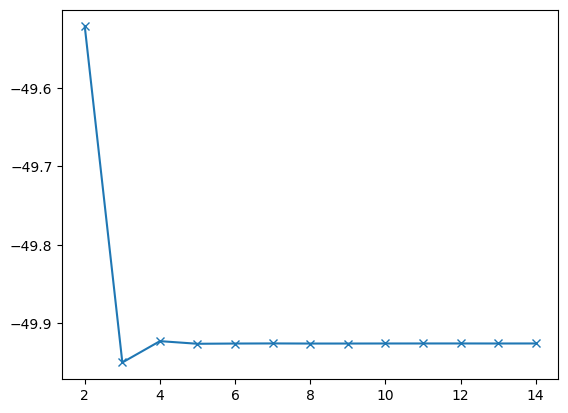

In [ ]:
plt.plot(kaes[1:14],energiasOptimas[1:14],'-x')

Dado esto, entonces estableceremos nuestro k con valor ``````k=8``````

Habiendo obtenido todas nuestras condicones necesarias para calcular, lo primero que haremos es obtener la estructura relajada, para ello estableceremos una rutina en GPAW que realice este proceso.
 
Por ende, nuestro script para calcular en el cluster es el siguiente

In [ ]:
from ase import Atoms
from ase.io  import  read 
from ase.visualize.plot import plot_atoms
from gpaw import GPAW,PW,FermiDirac
from math import sqrt
import numpy as np
from ase.optimize import BFGS
from ase.constraints import ExpCellFilter

penta = read("penta.cif")
calc = GPAW(mode=PW(750),
            xc='PBE',
            kpts=(8,8, 1),
            occupations=FermiDirac(0.01),
            txt='Penta_relaxed.log')

penta.calc = calc
#---------------------------------------
# relajacion
#---------------------------------------

Scell = ExpCellFilter(penta,mask=[1,1,0,0,0,1])
relax = BFGS(Scell)
relax.run(fmax=0.04)
penta.write("Penta_relaxed.cif")



Este código se ejecutó en el cluster y obtendremos los resultados para presentarlos en el reporte. Esta sería nuestra celda unitaria de pentagrafeno tras haber sido relajada.

<Axes: >

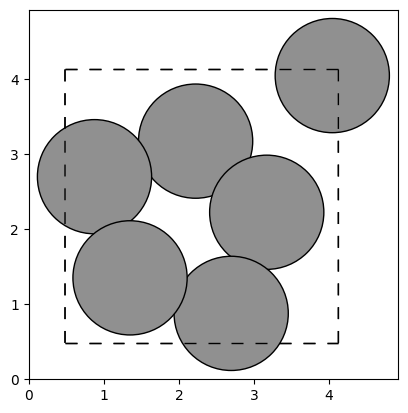

In [ ]:
penta_relax = read('Penta_relaxed.cif')
plot_atoms(penta_relax)

Ahora, con la estrcutura relajada procederemos a hallar las bandas. Para esto debemos entender la estrucutura de la celda unitaria. Y tras haber determinado esto podemos empezar a construir nuestros calculadores. 

['G', 'A', 'M', 'R', 'X', 'Z']


<Axes3D: >

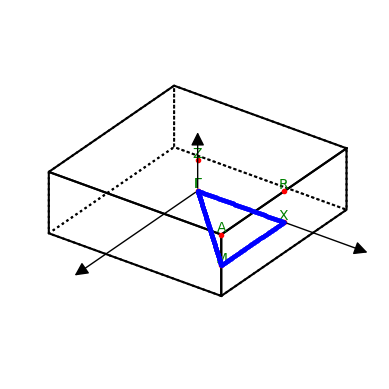

In [ ]:
st_relax = read("Penta_relaxed.cif")
st_relax.pbc = [True,True,False]
lat = st_relax.cell.get_bravais_lattice()
print(list(lat.get_special_points()))

path = st_relax.cell.bandpath('GMXG',npoints=300)
path.plot()


**1. Ondas Planas**  
Tras tener la distribución de los k-points, podemos realizar la estructura de bandas, esto con el siguiente código 

In [ ]:
from ase import Atoms
from ase.io  import  read 
from ase.visualize.plot import plot_atoms
from gpaw import GPAW,PW,FermiDirac
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from ase.optimize import BFGS
from ase.constraints import ExpCellFilter


st_relax = read("Penta_relaxed.cif")
calc = GPAW(mode=PW(750),
            xc='PBE',
            kpts=(4,4, 1),
            occupations=FermiDirac(0.01),
            txt='Penta_gs.log')
#st_relax.calc =calc
#st_relax.get_potential_energy()
#calc.write("Penta_gs.gpw")
print("ok")

calc_bands =GPAW('Penta_gs.gpw').fixed_density(
    nbands='nao',
    symmetry='off',
    kpts={'path': 'GMXG', 'npoints': 60},
    convergence={'bands': 16},
    txt='pentagraphene-bs.log')
#calc = GPAW('Penta_gs.gpw',fixdensity=True,
#            nbands='nao',
#            symmetry='off',
#            kpts={'path':'GX','npoints':100},
#            convergence={'bands': 24},
#            txt='pentagraphene-bs.log')
#---------------------------------------
#  run 
#---------------------------------------
calc_bands.get_potential_energy()
print("Ok, get  energy")
bs = calc_bands.band_structure()
bs.plot(filename='bandstructure.png', show=False, emax=10.0)


Luego, el resultado es el siguiente

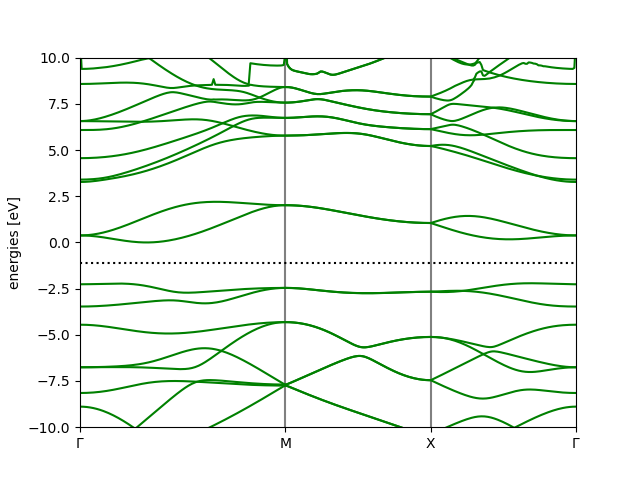

**2. LCAO**

Ahora, realicemos el mismo procedimiento con el método de LCAO (linear combination of atomic orbitals) y veamos que procesos se pueden realizar con él y que ventajas y desventajas tiene.

Lo primero que debemos tener en cuenta, es que a través de este método no se pueden realizar relajaciones en la estructura, así que para trabajar deberemos emplear una estructura que ya haya sido previamente relajada por otro método.

Por ende, procederemos a buscar la estructura de bandas directamente. A través del siguiente algoritmo

In [ ]:
from ase import Atoms
from ase.io  import  read 
from ase.visualize.plot import plot_atoms
from gpaw import GPAW,PW,FermiDirac
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from ase.optimize import BFGS
from ase.constraints import ExpCellFilter

label = 'lcao_'
calc = GPAW('lcao_PG_gs.gpw',fixdensity=True,
            nbands=24,
            symmetry='off',
            kpts={'path':'GMXG','npoints':300},
            parallel={'sl_auto':True},
            txt=label+'pentagraphene-bs.log')
#---------------------------------------
#  run 
#---------------------------------------
calc.get_potential_energy()
bs = calc.band_structure()
bs.plot(filename=label+'bandstructurePentagrafeno.png', show=False, emax=10.0)


La estrucutura de bandas usando LCAO tiene la siguiente forma 

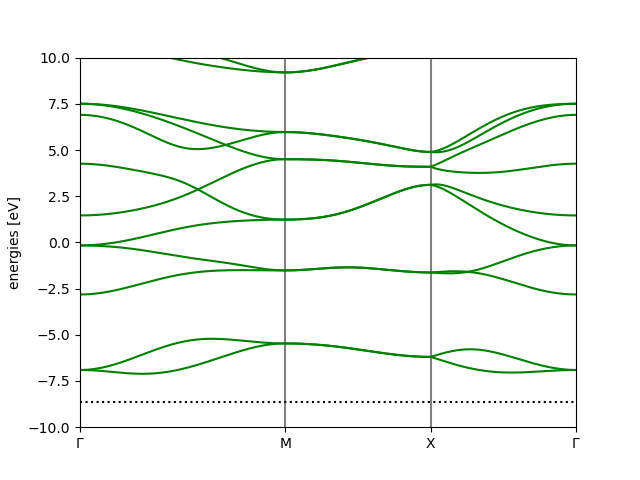

**3. Diferencias Finitas**



In [ ]:
from ase import Atoms
from ase.io  import  read 
from ase.visualize.plot import plot_atoms
from gpaw import GPAW,PW,FermiDirac
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from ase.optimize import BFGS
from ase.constraints import ExpCellFilter

label = 'fd_'
calc = GPAW('fd_PG_gs.gpw',fixdensity=True,
            nbands=24,
            symmetry='off',
            kpts={'path':'GMXG','npoints':300},
            parallel={'sl_auto':True},
            txt=label+'pentagraphene-bs.log')
#---------------------------------------
#  run 
#---------------------------------------
calc.get_potential_energy()
bs = calc.band_structure()
bs.plot(filename=label+'bandstructurePentagrafeno.png', show=False, emax=10.0)


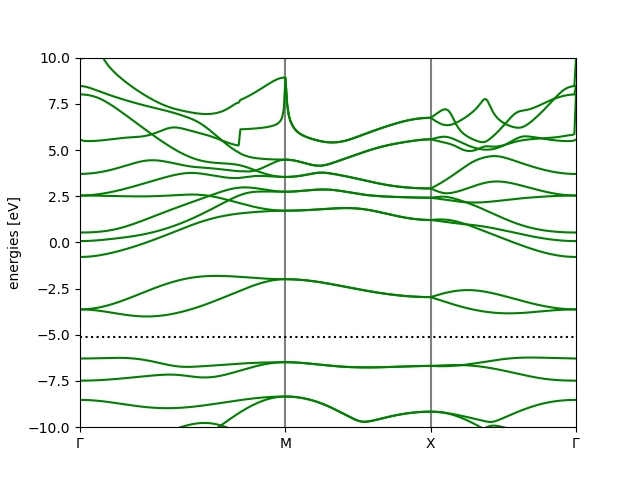

Tras haber realizado la estructura de bandas con tres métodos deiferentes, nos deja tranquilos las similitudes que existen en las bandas más cercanas al nivel de Fermi, debido a esto podemos decir que la estructura convergió de manera adecuada y que los cálculos se han hecho de manera correcta.

In [ ]:
import pandas as pd

df = pd.read_csv("Bands.csv", delimiter=',')
df

,Method,Energy,Iterations
0,PW,-49.948100,18
1,FD,-49.551922,20
2,LCAO,-40.699106,3


Una particularidad que vemos a la hora de realizar los cálculos, es que tienen variaciones tanto en las energías totales del sistema, como en la cantidad de iteraciones necesarias para la convergencia. Mientras que los métodos de Ondas planas (PW) y diferencias finitas (FD) tomaron un número considerablemente mayor de iteraciones e igualmente sus valores totales de energía son simialares; si tomamos el método de combinancion lineal de orbitales atómicos (LCAO) vemos diferencias bastante amplias en este rubro. 

## **Densidad de Estados**

La densidad de estados es un concepto fundamental en la física, especialmente en la física de materiales y la física estadística. Se refiere a la cantidad de estados o configuraciones disponibles por unidad de energía en un sistema físico.

En la mecánica cuántica, los estados son descritos por funciones de onda, y la densidad de estados se define como la cantidad de estados por unidad de volumen de espacio de momentos. En otras palabras, la densidad de estados es una medida de la cantidad de estados cuánticos disponibles para un sistema en función de su energía.

La densidad de estados es importante porque está relacionada con muchas propiedades macroscópicas de los materiales, como su capacidad térmica, conductividad eléctrica y magnética, y su espectro de absorción de luz. Además, la densidad de estados puede usarse para calcular la probabilidad de que un electrón o un fotón tenga una energía particular en un material, lo que es útil en la investigación de materiales para aplicaciones electrónicas, ópticas y energéticas.

La densidad de estados también es importante en la física estadística, donde se utiliza para calcular la energía libre de un sistema termodinámico, que a su vez puede utilizarse para predecir el comportamiento macroscópico del sistema en condiciones diferentes.

La densidad de estados del pentagrafeno depende de la energía y la dirección en la que se mida. En general, se espera que tenga una densidad de estados similar a la del grafeno, pero con algunas diferencias debido a su estructura pentagonal.

En particular, se espera que el pentagrafeno tenga una banda de energía electrónica completamente llena y una banda vacía parcialmente llena, lo que indica que tiene propiedades semiconductoras. Además, se espera que la densidad de estados cerca del nivel de Fermi sea menor que la del grafeno, lo que sugiere que el transporte de electrones puede ser más limitado en el pentagrafeno.

En general, la densidad de estados del pentagrafeno sigue siendo un tema activo de investigación en la física de materiales y la física teórica, y se espera que se descubran más propiedades interesantes a medida que se investigue más sobre este material prometedor.

In [ ]:
from ase import Atoms
from ase.io import read
from gpaw import GPAW, PW,FermiDirac
from ase.optimize import BFGS
from ase.constraints import ExpCellFilter
import matplotlib.pyplot as plt
# Density of States

label = 'PW-'
calc = GPAW('PW_Penta_gs.gpw',fixdensity=True,
            nbands= "nao", 
            kpts=(10,10,1),
            txt='PG-DOS-PW.log')

calc.get_potential_energy()
e, dos = calc.get_dos(spin=0, npts=2001, width=0.2)
e_f = calc.get_fermi_level()
fig, ax= plt.subplots()
ax.plot(e - e_f, dos)
plt.axis([-5, 5, None, 4])
plt.ylabel('DOS')
fig.savefig(label+"DOS-PG.png")
#plt.close()


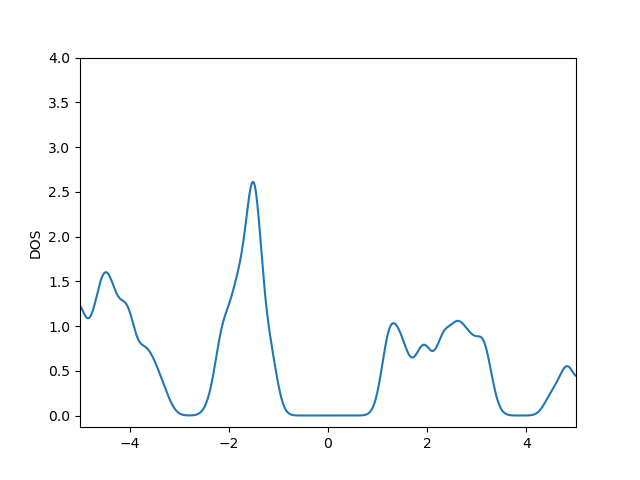

De esta gráfica podemos ver que para el caso del pentagrafeno, en valores de energía cercanos a ``-3``, a ``0`` y ``4``, practicamente no tenemos estados disponibles para ser ocupados, mientras que en valores cercanos a ``-4``, ``-2`` y ``2`` hay una mayor densidad de estados disponible. Esto puede tener implicaciones importantes en las propiedades electrónicas del material. Por ejemplo, si el material es un semiconductor,  una alta densidad de estados electrónicos en +2 y -2 puede significar que hay una mayor probabilidad de que los electrones sean excitados a esos niveles de energía, lo que puede influir en la conductividad del material. Por otro lado, una baja densidad de estados electrónicos en 0 y 4 podría significar que hay una menor probabilidad de que los electrones se muevan a esos niveles de energía, lo que puede influir en la capacidad del material para emitir luz en ese rango de energía. 

## **Absorción del Sistema**

Para este segmento, vamos a calcular el espectro absorción foto-electrónico. Para realizar este cálculo, siguiendo la documentación de GPAW, debemos de realizar un nuevo ground-state específico para esta tarea. El cual calculamos con la siguiente rutina.

In [ ]:
from ase import Atoms
from gpaw import GPAW
from ase.io  import  read, write
# Beryllium atom
atoms = read('penta.cif')
# Add 6.0 ang vacuum around the atom
atoms.center(vacuum=6.0)

# Create GPAW calculator
calc = GPAW(nbands=24, h=0.24)
# Attach calculator to atoms
atoms.calc = calc

# Calculate the ground state
energy = atoms.get_potential_energy()

# Save the ground state
calc.write('PG-PHA_gs.gpw', 'all')

Luego, teniendo nuestro nuevo ground state, procedemos a realizar el cálculo a través de esta rutina.

In [ ]:
from gpaw.tddft import *
from ase.io  import  write
time_step = 8.0                  # 1 attoseconds = 0.041341 autime
iterations = 2500                # 2500 x 8 as => 20 fs
kick_strength = [0.0,0.0,1e-3]   # Kick to z-direction

# Read ground state
td_calc = TDDFT('PG-PHA_gs.gpw')

# Save the time-dependent dipole moment to 'be_dm.dat'
DipoleMomentWriter(td_calc, 'PG_dm.dat')

# Use 'be_td.gpw' as restart file
RestartFileWriter(td_calc, 'PG_td.gpw')

# Kick with a delta pulse to z-direction
td_calc.absorption_kick(kick_strength=kick_strength)

# Propagate
td_calc.propagate(time_step, iterations)

# Save end result to 'be_td.gpw'
td_calc.write('PG_td.gpw', mode='all')

# Calculate photoabsorption spectrum and write it to 'be_spectrum_z.dat'
photoabsorption_spectrum('PG_dm.dat', 'PG_spectrum_z.dat')

Finalizado el cálculo, leamos los resultados.

In [ ]:
dat_file = r"PG_spectrum_z.dat"   

with open(dat_file, 'r') as file:
    text = file.read()
    print(text)

# Photoabsorption spectrum from real-time propagation
# GPAW version: 22.8.0
# Total time = 20.0000 fs, Time steps = [0.0000, 8.0000] as
# Kick = [0, 0, 0.001]
# Gaussian folding, Width = 0.2123 eV = 0.007802 Hartree <=> FWHM = 0.499928 eV
#    om (eV)                  S_x                  S_y                  S_z
    0.000000     0.0000000000e+00     0.0000000000e+00     0.0000000000e+00
    0.050000    -0.0000000000e+00    -0.0000000000e+00    -5.6395405405e-05
    0.100000    -0.0000000000e+00    -0.0000000000e+00    -2.0580410218e-04
    0.150000    -0.0000000000e+00    -0.0000000000e+00    -3.9584906932e-04
    0.200000    -0.0000000000e+00    -0.0000000000e+00    -5.5965844030e-04
    0.250000    -0.0000000000e+00    -0.0000000000e+00    -6.3807592353e-04
    0.300000    -0.0000000000e+00    -0.0000000000e+00    -5.9774292815e-04
    0.350000    -0.0000000000e+00    -0.0000000000e+00    -4.3902791500e-04
    0.400000    -0.0000000000e+00    -0.0000000000e+00    -1.9212361366e-04


Como vemos, tenemos cuatro columnas en total, una para los valores en electronvoltios, y otra para las posiciones en el espacio. Como vemos, todas las posiciones en ```x``` y en ```y``` son 0, por ende solo vamos a guardar los valores de ```eV``` y de ```z``` para graficar.

In [ ]:
df = pd.read_csv("PG_spectrum_z.dat", sep= "\s+",
                 skiprows=6,
                 usecols=[0,3],
                 names=['eV','z'])

df.head()

,eV,z
0,0.00,0.000000
1,0.05,-0.000056
2,0.10,-0.000206
3,0.15,-0.000396
4,0.20,-0.000560


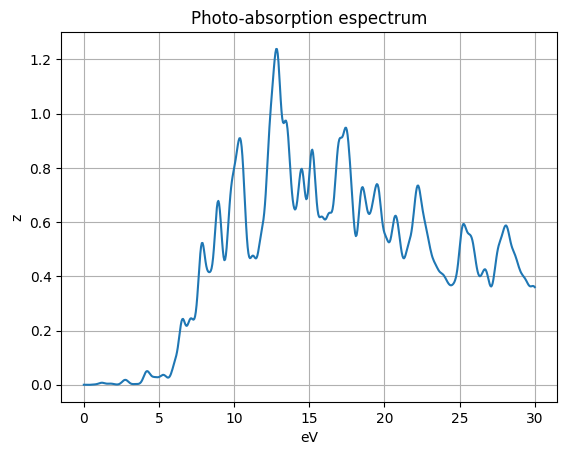

In [ ]:
import matplotlib.pyplot as plt

eV_list = df[df.columns[0]].values.tolist()
z_list = df[df.columns[1]].values.tolist()

plt.plot(eV_list,z_list)
plt.title("Photo-absorption espectrum")
plt.grid()
plt.xlabel('eV')
plt.ylabel('z')
plt.show()


Un valor de energía de 10 a 15 eV en el espectro de fotoabsorción sugiere que la muestra absorbe radiación electromagnética en ese rango de energía. En general, esta absorción puede ser el resultado de transiciones electrónicas desde el estado fundamental de la muestra a estados excitados que se encuentran en ese rango de energía.

La energía de 10 a 15 eV corresponde a la región del espectro electromagnético que se encuentra en la región de los rayos X suaves. Esta región de energía es más alta que la de la luz visible, por lo que el espectro de fotoabsorción indica que la muestra es capaz de absorber energía en una región del espectro electromagnético que no es visible para el ojo humano.

## **Fonones**



Finalmente para completar el informe vamos a enfrentar el reto de calcular los fonones. Para esto implementaremos una rutina con GPAW, usando ondas planas como método de cálculo.

Despues de muchos intentos, finalmente logramos completar el reto



In [ ]:
#Usando EMT
from ase.calculators.emt import EMT
from ase.phonons import Phonons
from ase import Atoms
from gpaw import GPAW, PW, FermiDirac
from ase.io  import  read, write
import matplotlib.pyplot as plt


atoms = read("Penta_relaxed.cif")

calc = GPAW(mode=PW(650),xc='PBE',kpts={'size':(3,3,1),'gamma':True},
            symmetry='off', occupations=FermiDirac(0.01))

ph = Phonons(atoms,calc,supercell=(7,7,1))
ph.run()
ph.read(method='frederiksen',acoustic=True)
path = atoms.cell.bandpath('GMXG', npoints=200)
bs = ph.get_band_structure(path)
dos = ph.get_dos(kpts=(20,20,20)).sample_grid(npts=100,width=1e-3)

fig = plt.figure(1, figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.1
bs.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos.get_weights(), dos.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)

fig.savefig('Al_phonon.png')

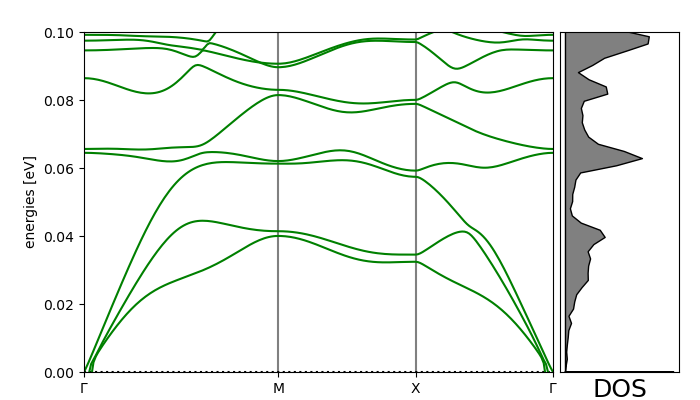

Los fonones son cuasipartículas que se utilizan para describir las vibraciones de la red cristalina de un sólido. Se pueden interpretar como paquetes de energía que se propagan a través del material en forma de ondas mecánicas.

La interpretación de los fonones es importante en la física del estado sólido porque estas vibraciones de la red cristalina pueden influir en las propiedades térmicas, eléctricas, magnéticas y ópticas de los materiales. En particular, los fonones son importantes en el estudio de la conductividad térmica y la difusión de calor en los materiales sólidos, ya que las vibraciones de la red cristalina son responsables de la transferencia de energía térmica a través del material.

Además, los fonones también pueden influir en las propiedades electrónicas de los materiales. Por ejemplo, los fonones pueden dispersar los electrones, lo que afecta a la movilidad y la resistividad electrónicas del material. Los fonones también pueden estar involucrados en procesos de excitación electrónica, como la absorción de luz o la emisión de luz.

##**Conclusiones**

El pentagrafeno es un material bidimensional de estructura pentagonal similar al grafeno, que ha generado mucho interés en la comunidad científica debido a sus propiedades electrónicas y estructurales únicas.

En cuanto al espectro de fotoabsorción que hemos obtenido, los valores más altos que se encuentran entre 10 y 15 eV sugieren que el pentagrafeno puede absorber radiación electromagnética en ese rango de energía. Esta absorción puede estar relacionada con transiciones electrónicas desde el estado fundamental de la muestra a estados excitados que se encuentran en ese rango de energía.

La interpretación detallada del espectro de fotoabsorción de pentagrafeno requeriría un análisis más profundo y detallado de los datos experimentales, pero en general, el espectro puede proporcionar información valiosa sobre la estructura electrónica y la composición química del material.

En cuanto a los fonones, se puede inferir que el pentagrafeno también tiene vibraciones de red cristalina que pueden influir en sus propiedades térmicas, eléctricas, magnéticas y ópticas. 

Por otra parte, GPAW y ASE han sido grandiosas herramientas en el desarrollo de este trabajo, pues son entornos de software muy completos y amigables que permiten al usuario adaptarse a una variedad formas de cálculo, desde lo que podemos considerar como un ensayo hasta modos más elaborados y aceptados por la comunidad científica.

En resumen, el espectro de fotoabsorción y los fonones son herramientas importantes en el estudio de las propiedades de pentagrafeno y en general de cualquier material, y se pueden utilizar para caracterizar su estructura electrónica, composición química, propiedades térmicas, eléctricas, magnéticas y ópticas. Los resultados de estas investigaciones pueden ser útiles para entender mejor el comportamiento y las posibles aplicaciones de este material en diferentes campos de la ciencia y la tecnología.







## **Referencias**

[Densidad de Estados - Wikipedia](https://es.wikipedia.org/wiki/Densidad_de_estados)

[Pentagrafeno - PNAS](https://www.pnas.org/doi/full/10.1073/pnas.1416591112)

[Documentación ASE](https://wiki.fysik.dtu.dk/ase/)

[Documentación GPAW](https://wiki.fysik.dtu.dk/gpaw/)

[Espectro de absoción - Wikipedia](https://en.wikipedia.org/wiki/Absorption_spectroscopy)

[Band Estructure - Wikipedia](https://en.wikipedia.org/wiki/Electronic_band_structure)